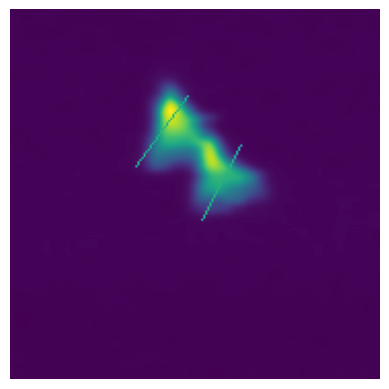

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2 as cv
from typing import Tuple
import pickle

import btriangle_detection, btriangle_properties



im1 = np.load('bias_0-0025.npy', allow_pickle=True)

res_h = 2
min_area_h = (im1.shape[0]*im1.shape[1]*res_h*res_h)*0.001

gray_orig, ims, masks = btriangle_detection.triangle_segmentation_alg(im1, res = res_h, min_area = min_area_h, thr_method = 'triangle', inv = True, denoising = True, allow_MET = True, direction ='down')


#if basis_cor is set to True, alternative baseline computation is conducted by taking the longest side of the contour
#(not default)
#axes_points,axes,line_img = btriangle_properties.find_detuning_axes(gray_orig, masks, direction = 'down', basis_cor = True)

base, corner_pts, c_im = btriangle_properties.detect_base_alt(gray_orig, masks, 'down')
axes_points,axes,line_img = btriangle_properties.detect_detuning_axis(gray_orig, base, corner_pts)

plt.imshow(line_img)
plt.axis('off')
plt.show()

/Users/madeleine/Downloads/btriangle_properties.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = lstsq(A, y_coords)[0]


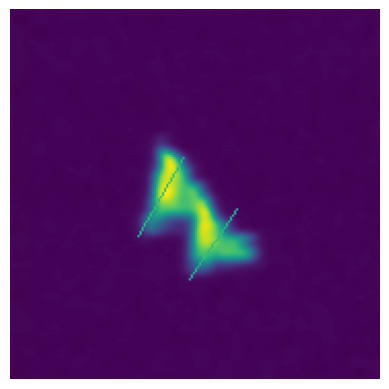

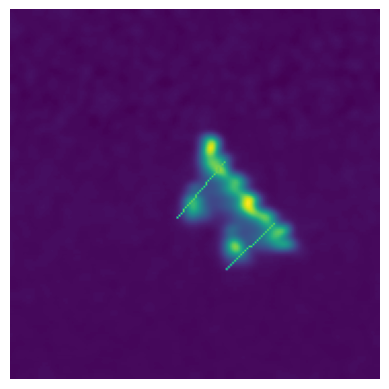

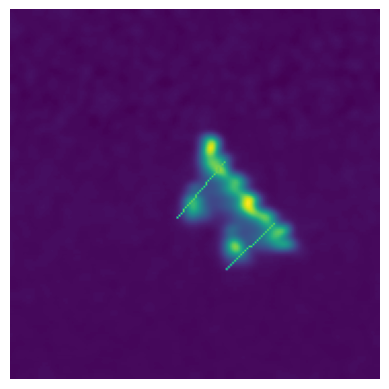

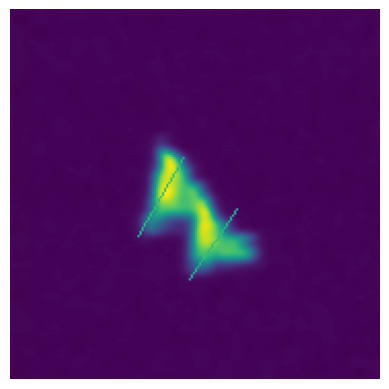

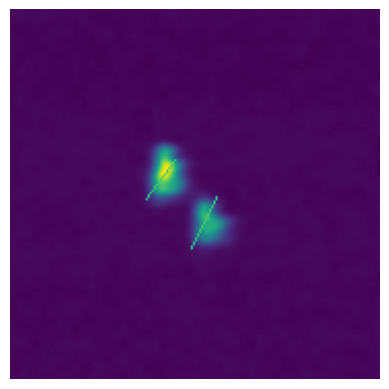

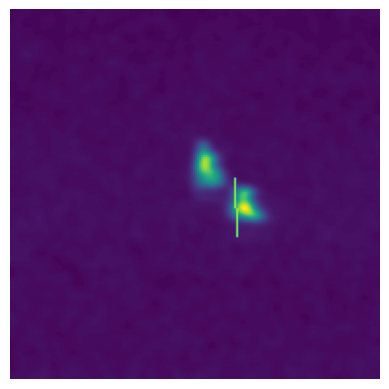

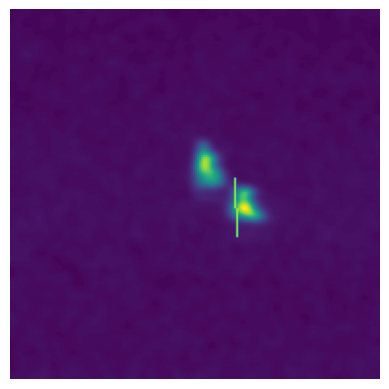

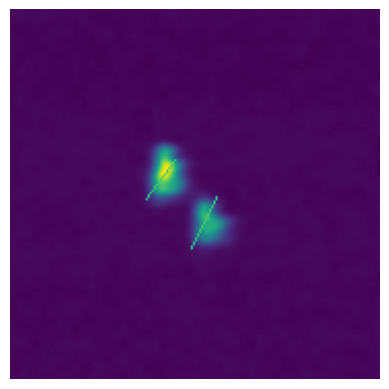

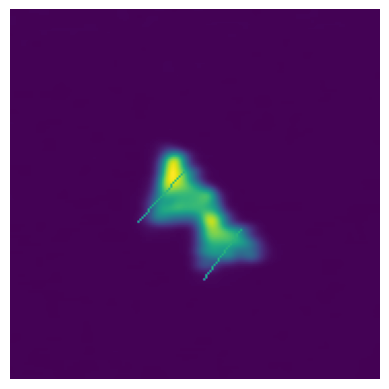

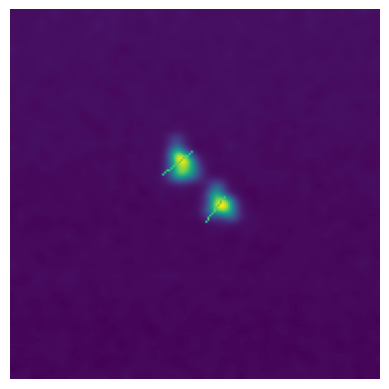

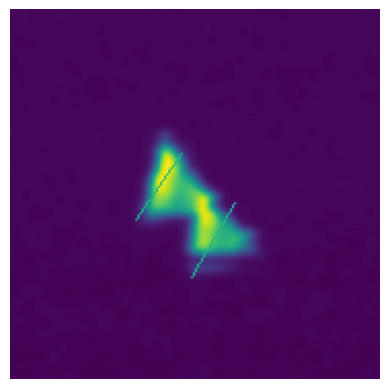

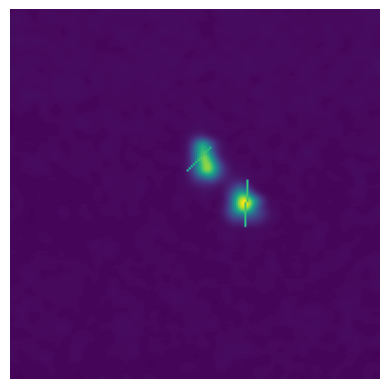

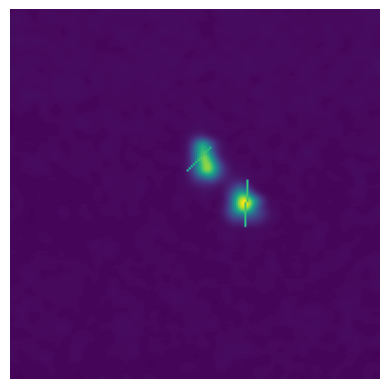

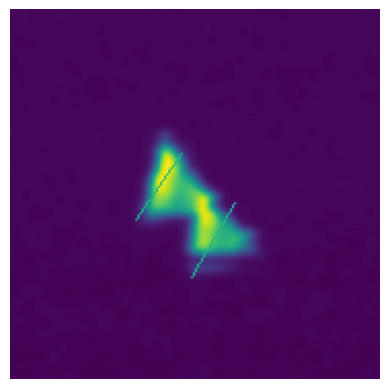

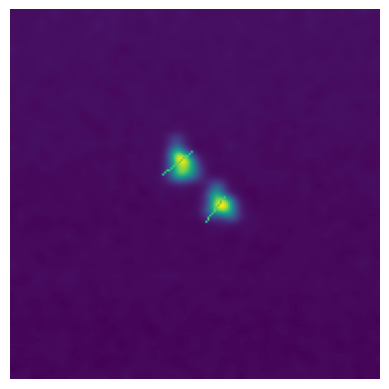

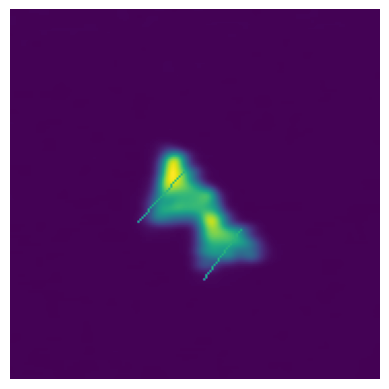

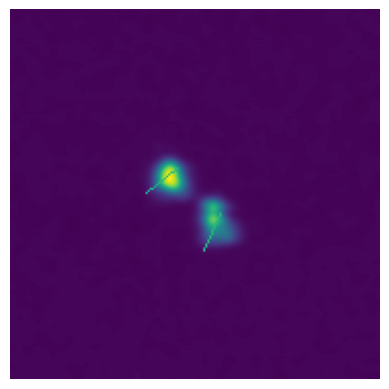

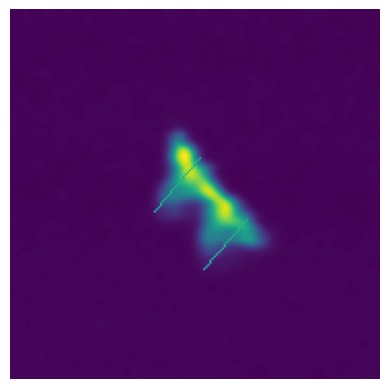

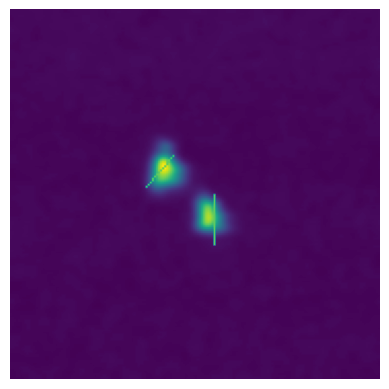

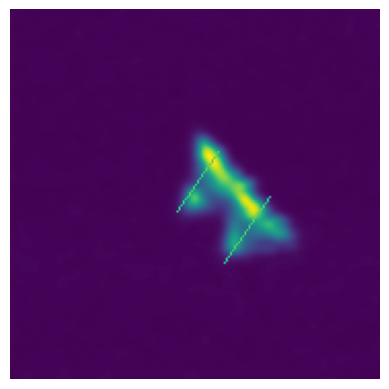

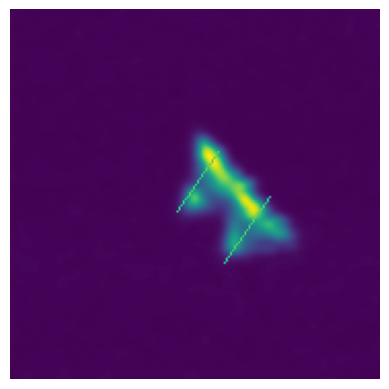

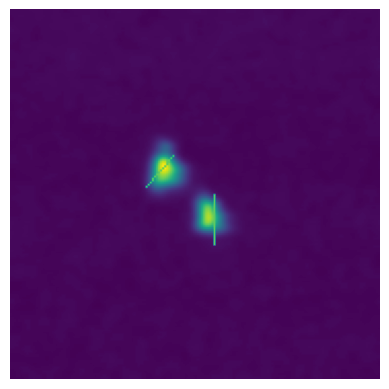

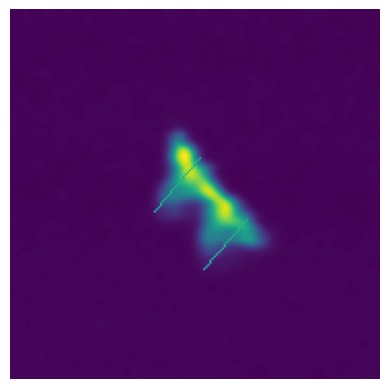

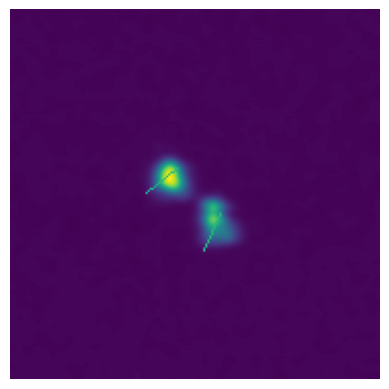

KeyError: 'triangle_scan'

In [8]:
data_path = '20230609_det_line_collection_overnight/central_database/'
files = []
for filename in os.listdir(data_path):
    if filename.startswith('_Root_0'):
        files.append(pickle.load(open(data_path+filename, "rb")))
        

for i in range(len(files)):
    im1 = files[i]['triangle_scan']['I_SD'].to_numpy()
    res_h = 2
    min_area_h = (im1.shape[0]*im1.shape[1]*res_h*res_h)*0.001

    gray_orig, ims, masks = btriangle_detection.triangle_segmentation_alg(im1, res = res_h, min_area = min_area_h, thr_method = 'triangle', inv = True, denoising = True, allow_MET = True, direction ='down')



    base, corner_pts, c_im = btriangle_properties.detect_base_alt(gray_orig, masks, 'down')
    axes_points,axes,line_img = btriangle_properties.detect_detuning_axis(gray_orig, base, corner_pts)



    plt.imshow(line_img)
    plt.axis('off')
    plt.show()        